In [1]:
import tensorflow as tf

D:\ANACONDA\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import keras 
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from keras.layers import MaxPooling2D,Dense,Flatten,Conv2D,Dropout

In [8]:
import matplotlib.pyplot as plt 
import os

In [9]:
import cv2
import imghdr

In [10]:
data_dir =  'C:/Users/mistr/Downloads/archive/0 FaceImages'

In [11]:
os.listdir(os.path.join(data_dir,'Active Subjects'))

['image_0 (10).jpg',
 'image_0 (15).jpg',
 'image_0 (3).jpg',
 'image_0 (4).jpg',
 'image_0 (5).jpg',
 'image_0 (6).jpg',
 'image_0 (7).jpg',
 'image_0 (8).jpg',
 'image_0 (9).jpg',
 'image_0.jpg',
 'image_0141.jpg',
 'image_0157.jpg',
 'image_0158.jpg',
 'image_0161.jpg',
 'image_0162.jpg',
 'image_0164.jpg',
 'image_0165.jpg',
 'image_0166.jpg',
 'image_0167.jpg',
 'image_0168.jpg',
 'image_0169.jpg',
 'image_0170.jpg',
 'image_0172.jpg',
 'image_0174.jpg',
 'image_0175.jpg',
 'image_0176.jpg',
 'image_0177.jpg',
 'image_0178.jpg',
 'image_0179.jpg',
 'image_0180.jpg',
 'image_0181.jpg',
 'image_0182.jpg',
 'image_0183.jpg',
 'image_0184.jpg',
 'image_0185.jpg',
 'image_0186.jpg',
 'image_0187.jpg',
 'image_0188.jpg',
 'image_0189.jpg',
 'image_0191.jpg',
 'image_0192.jpg',
 'image_0193.jpg',
 'image_0194.jpg',
 'image_0195.jpg',
 'image_0196.jpg',
 'image_0197.jpg',
 'image_0198.jpg',
 'image_0199.jpg',
 'image_0200.jpg',
 'image_0201.jpg',
 'image_0202.jpg',
 'image_0203.jpg',
 'im

In [12]:
import numpy as np

In [13]:
data = keras.utils.image_dataset_from_directory(data_dir)

Found 9120 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
len(batch)

2

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
data = data.map(lambda x,y: (x/255,y))

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()

In [21]:
batch[0].max()

1.0

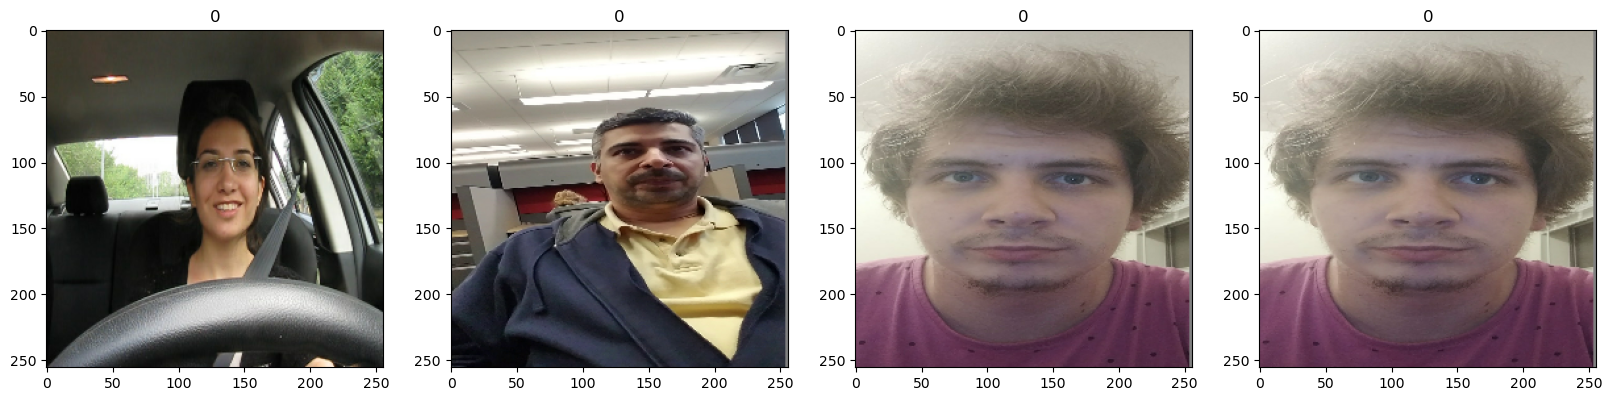

In [22]:
fig,ax = plt.subplots(ncols = 4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
len(data)

285

In [24]:
train_size = int(len(data)* .7)
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)+1

In [25]:
test_size

29

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
len(test)

29

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [30]:
model.compile('adam' ,loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [62]:
history= model.fit(train,epochs=50,validation_data = val)

Epoch 1/50
199/199 [==============================] - 220s 1s/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.3493 - val_accuracy: 0.9337
Epoch 2/50
199/199 [==============================] - 169s 845ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.3844 - val_accuracy: 0.9293
Epoch 3/50
199/199 [==============================] - 169s 842ms/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.3600 - val_accuracy: 0.9337
Epoch 4/50
199/199 [==============================] - 170s 850ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.3508 - val_accuracy: 0.9391
Epoch 5/50
199/199 [==============================] - 169s 842ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.3590 - val_accuracy: 0.9386
Epoch 6/50
199/199 [==============================] - 170s 847ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.3670 - val_accuracy: 0.9413
Epoch 7/50
199/199 [==============================] - 171s 853ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.2951 - va

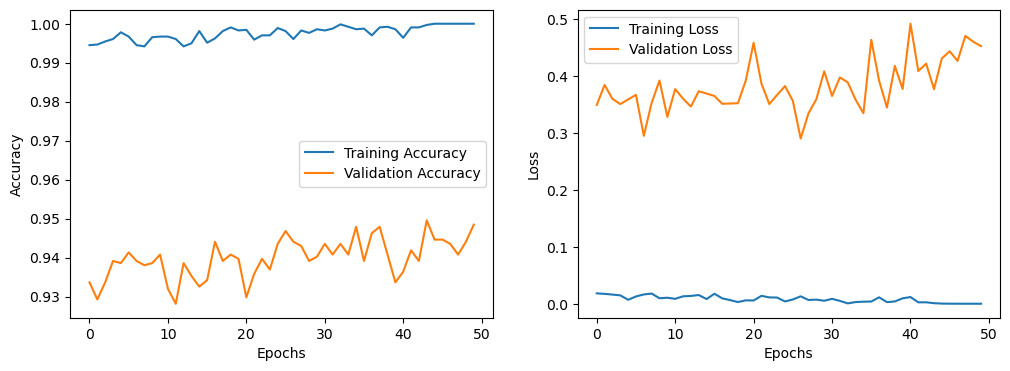

In [64]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [65]:
from keras.metrics import Precision,Recall,BinaryAccuracy

In [66]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [67]:
len(test)

29

In [70]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 135ms/step


In [72]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.9348066449165344,Recall:0.9145945906639099,Accuracy:0.9256465435028076


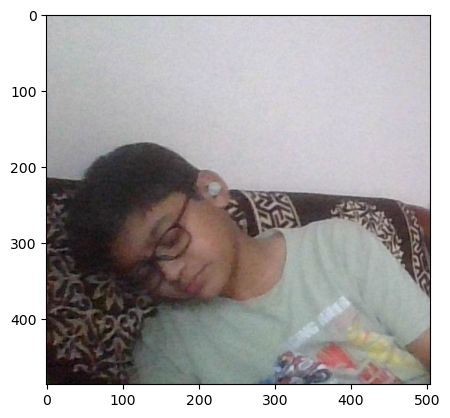

In [73]:
img = cv2.imread('c.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

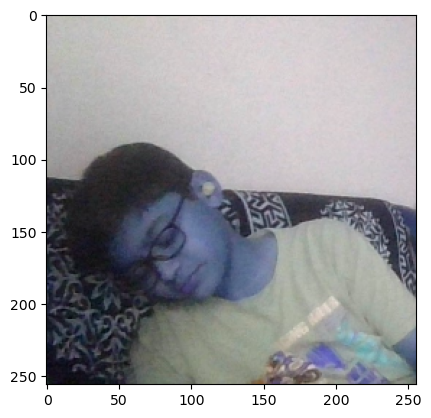

In [74]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [75]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 1s 858ms/step


In [76]:
if yhat>0.5 :
    print('predicted class is drowsiness')
else  :
    print('predicted class is awake')

predicted class is drowsiness


In [77]:
from tensorflow.keras.models import load_model


In [78]:
model.save(os.path.join('models','drowsinessmodel.h5'))